In [66]:
import numpy as np
import sys

def getSymbols():
    return np.random.randint(0, 256, (200, 8, 10))

def getImage():
    return np.random.randint(0, 256, (630, 480))

In [67]:
np.random.seed(1)

symbols = getSymbols()
image = getImage()

In [68]:
symbol_height = symbols[0].shape[0]

Cut the image to make its height to be divisible by symbols height. (**Useless in current implementation**)

In [107]:
rows_number = image.shape[0] / symbol_height
print image.shape
image = image[:rows_number*symbol_height, :]
print image.shape

(624, 480)
(624, 480)


In [137]:
cache = np.zeros((rows_number, image.shape[1]), int)
cache.fill(-1)
parent_symbol = np.zeros((rows_number, image.shape[1] + 1), int)
inf = sys.maxint

def loss(row, pos, symbol):
    image_part = image[row * symbol_height : (row + 1) * symbol_height, pos : pos + symbol.shape[1]]
    return np.linalg.norm(symbol - image_part)**2

def dp(row, pos):
    if pos == image.shape[1]:
        return 0
    
    if pos > image.shape[1]:
        return inf
    
    if cache[row, pos] != -1:
        return cache[row, pos]
    
    res = inf
    
    for symbol_ind, symbol in enumerate(symbols):
        next_pos = pos + symbol.shape[1]
        cur_res = dp(row, next_pos) + loss(row, pos, symbol)
        if cur_res < res:
            res = cur_res
            parent_symbol[row, next_pos] = symbol_ind
    
    cache[row, pos] = res
    return res

taken_symbols = []

for row in xrange(rows_number):
    parent_symbol.fill(-1)
    dp(row, 0)
    cur_symbols = []
    pos = image.shape[1]
    while parent_symbol[row, pos] != -1:
        cur_symbols.append(parent_symbol[row, pos])
        pos -= symbols[parent_symbol[row, pos]].shape[1]
    taken_symbols.append(cur_symbols)

(78, 48)
[[ 64   2 153 ..., 109  52 190]
 [100  15 191 ..., 191 193 126]
 [109  83  96 ...,  35 164  57]
 ..., 
 [189  65 152 ..., 103  30  68]
 [  2 188  11 ..., 155 119  52]
 [116  37 138 ...,  25  96 191]]


In [144]:
print "len(taken_symbols) =", len(taken_symbols)
print taken_symbols[0]
print taken_symbols[1]

len(taken_symbols) = 78
[ 64   2 153 182  99 121 168 193 121 140 184  50 162  55 103 118 173 193
  38   2 131 189  25  78 148 121 181  60  79   9  62 152  25  73 133  30
 124  77   9  48 126  96 175  10  38 109  52 190]
[100  15 191  30  57  30 199  95  30 137 115  38  69 126 100  98 199  96
  30 138 160   4 119 115  96  75  59 163  68 190 197  38 191 175  38 192
 175 138  89  47  30 151  88  86  36 191 193 126]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Image
img = Image.open('test_img.jpg')
img = np.array(img)

# Convert RGB to grayscale
def rgb2gray(img):
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    return 0.299*R + 0.587*G + 0.114*B

def show_photo(ph, size =(8,8)):
    plt.figure(figsize=size)
    plt.imshow(ph, cmap = 'gray', interpolation='none')
    plt.show()

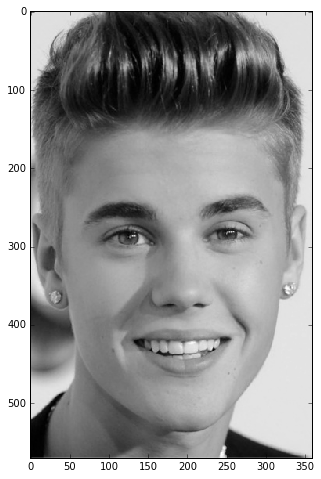

In [20]:
show_photo(rgb2gray(img))

In [15]:
a.shape

(570, 360, 3)